In [194]:
### 

In [916]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [917]:
#Import the excel sheet to jupyter notebook
home_df = pd.read_excel('./Data_MidTerm_Project_Real_State_Regression.xls')

In [918]:
#overview first 5 observations of the datasets 
home_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [919]:
#information about the observations and instances of our datasets
#Also gives insight about the datatypes of the instances
home_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [920]:
#description of the data in the DataFrame
home_df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [921]:
#Check if there are  null values in our dataframe
home_df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [922]:
#check for duplicates
home_df.duplicated().unique()

array([False])

### Declaring functions

In [923]:
#floor and round up floats
def roundup(number):
    if isinstance(number, float):
        if number - math.floor(number) < 0.5:
            return math.floor(number)
        else: return math.ceil(number)
    else: pass


In [924]:
#convert square feet to meter squared
def convert_sqft_m2(sq_meter):
    if isinstance(sq_meter, int):
        result = round(sq_meter / 10.764,-1)
    else: return sq_meter
    return result

In [925]:
#removing outliers
#we create a function to get rid of the outliers

def rem_outliers(x):
    q1 = x.quantile(0.05)
    q3 = x.quantile(0.90)
    iqr = q3 - q1
    return ~((x < (q1 - 1.5*iqr)) | (x > (q3 + 1.5*iqr)))

In [926]:
#converting square meters bathrooms to labels of yes and no
def lab_waterfront(label):
    if label == 0:
        return 'no'
    elif label > 0:
        return 'yes'
    else: label

In [927]:
#creating a new dataframe that only selects the numerical variables
num_df = home_df.select_dtypes(include= np.number)

### Plotting graphs to spot trends and colinearity

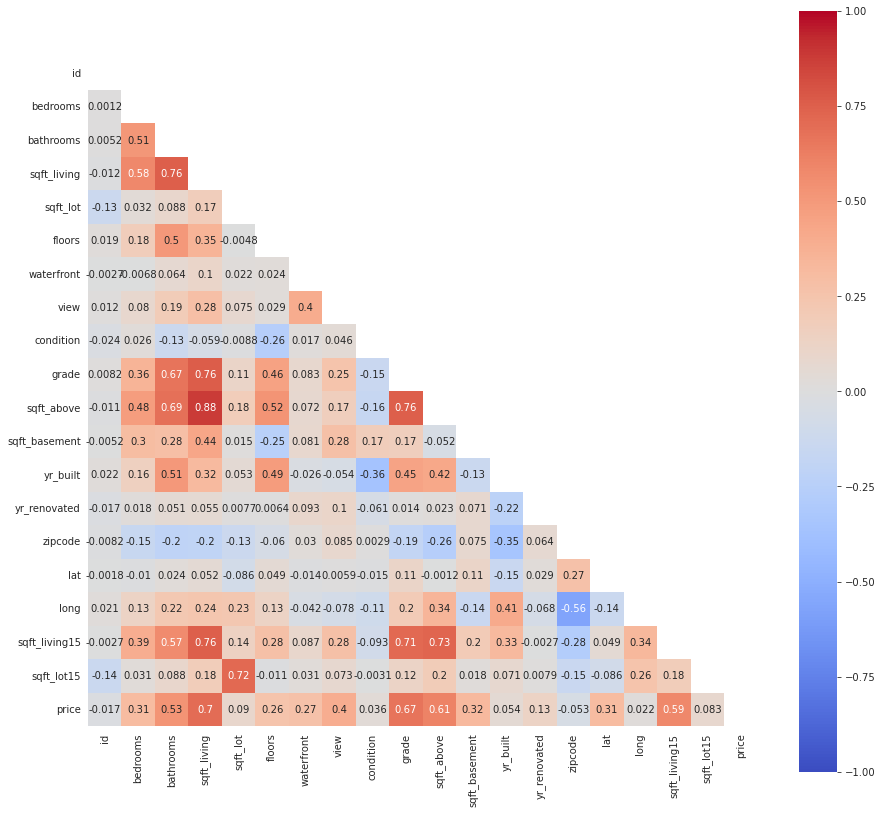

In [928]:
#creating a correlated variable corr
corr = home_df.corr()
mask = np.zeros_like(corr)
#Generate a mask to only show bottom triangle
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    
    #set figure size
    f, ax = plt.subplots(figsize=(15, 14))
    
    #generate heatmap
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [929]:
#sns.pairplot(home_df)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title=

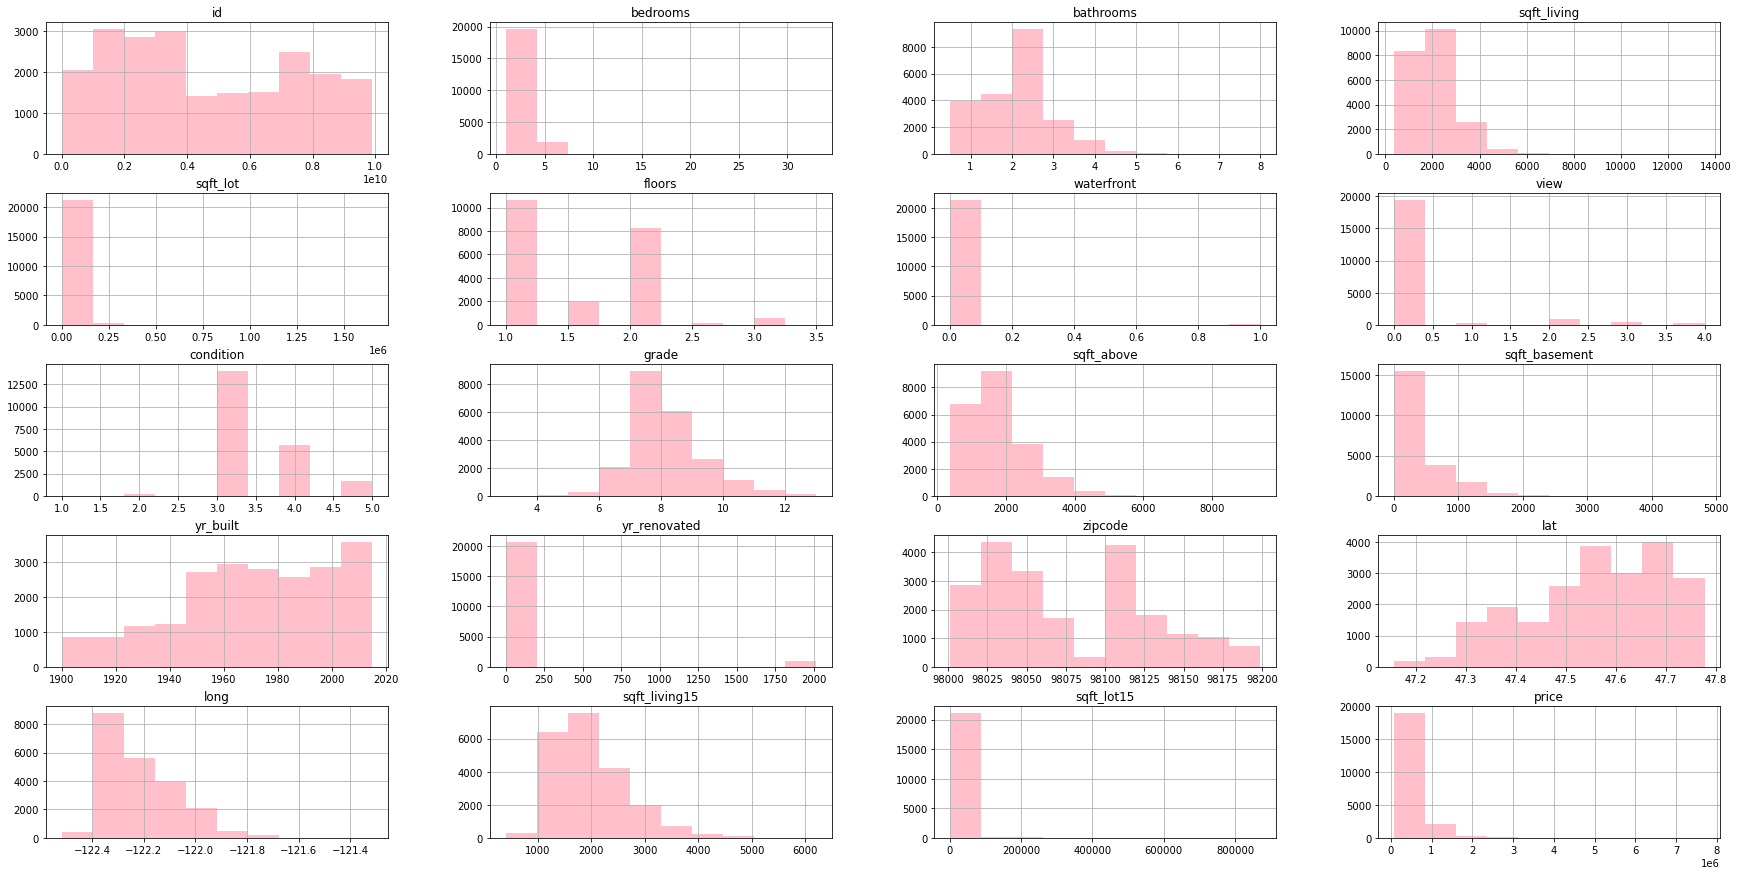

In [930]:
num_df.hist(figsize=(30, 15), color = 'pink')

### Applying functions to our features

In [931]:
#Convert Square feet living to Square meter living
home_df['sqft_living'] = home_df['sqft_living'].apply(convert_sqft_m2).astype(int)

#Convert Square feet lot to Square meter lot
home_df['sqft_lot'] = home_df['sqft_lot'].apply(convert_sqft_m2).astype(int)

#Convert Square feet above to Sqaure meter above
home_df['sqft_above']  = home_df['sqft_above'].apply(convert_sqft_m2).astype(int)

#Convert Square feet  basement to Square meter basement 
home_df['sqft_basement'] = home_df['sqft_basement'].apply(convert_sqft_m2).astype(int)

#Convert Square feet living 15 to Square meter living 15 
home_df['sqft_living15'] = home_df['sqft_living15'].apply(convert_sqft_m2).astype(int)

#Convert Square feet lot 15 to Square meter lot 15 
home_df['sqft_lot15'] = home_df['sqft_lot15'].apply(convert_sqft_m2).astype(int)

In [932]:
##round up floors instances to whole numbers
home_df['floors'] = home_df['floors'].apply(roundup).astype(int)

#round up bedrooms instances to whole numbers
home_df['bathrooms'] = home_df['bathrooms'].apply(roundup).astype(int)

In [933]:
# home_df['waterfront'] = home_df['waterfront'].apply(lab_waterfront)

In [934]:
#Dropping columns that would have no effect on the model
home_df.drop(['id'], inplace = True, axis = 1)

In [935]:
#removing features that we couldnt apply the outlier functions to
columns_trim = num_df.drop(['price', 'zipcode'], axis = 1)

#remove outliers
inliers = rem_outliers(columns_trim).all(1)

#reassigning the removed outlier features back to our original dataframe
home_df = home_df[inliers]

In [936]:
#checking our dataframe to see the new info
home_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17786 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17786 non-null  datetime64[ns]
 1   bedrooms       17786 non-null  int64         
 2   bathrooms      17786 non-null  int64         
 3   sqft_living    17786 non-null  int64         
 4   sqft_lot       17786 non-null  int64         
 5   floors         17786 non-null  int64         
 6   waterfront     17786 non-null  int64         
 7   view           17786 non-null  int64         
 8   condition      17786 non-null  int64         
 9   grade          17786 non-null  int64         
 10  sqft_above     17786 non-null  int64         
 11  sqft_basement  17786 non-null  int64         
 12  yr_built       17786 non-null  int64         
 13  yr_renovated   17786 non-null  int64         
 14  zipcode        17786 non-null  int64         
 15  lat            1778

In [937]:
#Checking for null values
home_df.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [938]:
#Changing column head names
home_df.rename(columns={'sqft_living': 'sqm_living', 'sqft_lot': 'sqm_lot','sqft_above' : 'sqm_above', \
                       'sqft_basement':'sqm_basement', 'sqft_living15': 'sqm_living15', \
                        'sqft_lot15': 'sqm_lot15'}, inplace= True)

In [939]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17786 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          17786 non-null  datetime64[ns]
 1   bedrooms      17786 non-null  int64         
 2   bathrooms     17786 non-null  int64         
 3   sqm_living    17786 non-null  int64         
 4   sqm_lot       17786 non-null  int64         
 5   floors        17786 non-null  int64         
 6   waterfront    17786 non-null  int64         
 7   view          17786 non-null  int64         
 8   condition     17786 non-null  int64         
 9   grade         17786 non-null  int64         
 10  sqm_above     17786 non-null  int64         
 11  sqm_basement  17786 non-null  int64         
 12  yr_built      17786 non-null  int64         
 13  yr_renovated  17786 non-null  int64         
 14  zipcode       17786 non-null  int64         
 15  lat           17786 non-null  float6

In [940]:
#Create correlation matrix
cor_matrix = home_df.corr().abs()
print(cor_matrix)


# Select upper triangle of correlation matrix
upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k = 1).astype(np.bool))
print(upper_triangle)


# Find features with correlation greater than 0.80
drop_cor = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print(); print(drop_cor)

# Drop features 
home_df.drop(drop_cor, axis=1, inplace=True)

              bedrooms  bathrooms  sqm_living   sqm_lot    floors  waterfront  \
bedrooms      1.000000   0.486609    0.620672  0.169831  0.184257         NaN   
bathrooms     0.486609   1.000000    0.703514  0.065193  0.473695         NaN   
sqm_living    0.620672   0.703514    1.000000  0.284619  0.336992         NaN   
sqm_lot       0.169831   0.065193    0.284619  1.000000  0.167243         NaN   
floors        0.184257   0.473695    0.336992  0.167243  1.000000         NaN   
waterfront         NaN        NaN         NaN       NaN       NaN         NaN   
view               NaN        NaN         NaN       NaN       NaN         NaN   
condition     0.024749   0.170229    0.078109  0.061436  0.243465         NaN   
grade         0.358499   0.626626    0.732837  0.195214  0.429392         NaN   
sqm_above     0.506831   0.656246    0.873028  0.265451  0.498696         NaN   
sqm_basement  0.276973   0.157470    0.337764  0.063708  0.280910         NaN   
yr_built      0.182278   0.5

['sqm_above', 'sqm_lot15']


/var/folders/zz/nrq5wf4d1nggkmxz_00gpldh0000gn/T/ipykernel_81825/1146812982.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k = 1).astype(np.bool))


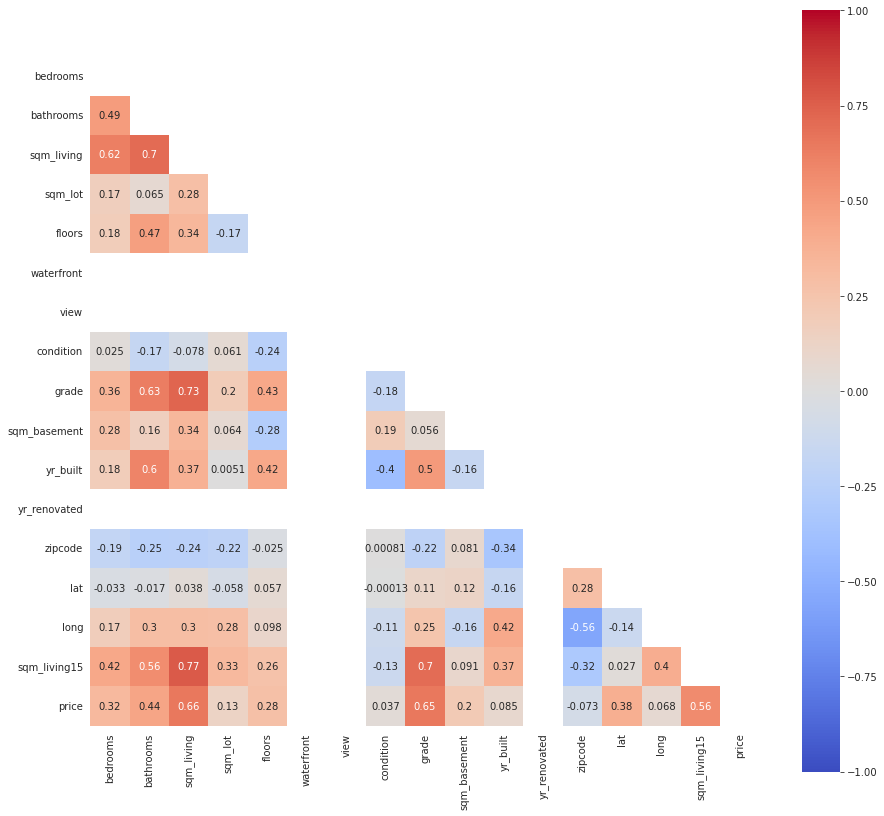

In [941]:
#creating a correlated variable corr
corrs = home_df.corr()
mask = np.zeros_like(corrs)
#Generate a mask to only show bottom triangle
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    
    #set figure size
    f, ax = plt.subplots(figsize=(15, 14))
    
    #generate heatmap
    ax = sns.heatmap(corrs, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [942]:
home_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17786 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          17786 non-null  datetime64[ns]
 1   bedrooms      17786 non-null  int64         
 2   bathrooms     17786 non-null  int64         
 3   sqm_living    17786 non-null  int64         
 4   sqm_lot       17786 non-null  int64         
 5   floors        17786 non-null  int64         
 6   waterfront    17786 non-null  int64         
 7   view          17786 non-null  int64         
 8   condition     17786 non-null  int64         
 9   grade         17786 non-null  int64         
 10  sqm_basement  17786 non-null  int64         
 11  yr_built      17786 non-null  int64         
 12  yr_renovated  17786 non-null  int64         
 13  zipcode       17786 non-null  int64         
 14  lat           17786 non-null  float64       
 15  long          17786 non-null  float6

### ENCODING

In [943]:
#Encoding the zipcode by creating a dummy and the reassigning it to the dataframe
dnm_var = pd.get_dummies(home_df['zipcode'], drop_first=True)

home_df = pd.concat([home_df,dnm_var],axis=1) 

In [944]:
dnm_var

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [945]:
#Dropping columns that wont be used in our model
home_df=home_df.drop(['date', 'lat', 'long', 'zipcode','sqm_living15', 'sqm_lot'],axis=1)


### X Y SPLIT

In [946]:
#SPlitting both X and Y
# X would be all our numeric/ independent variables, we would be dropping the price here
#Y is our target variable

X=home_df.drop('price', axis=1)
y=home_df.price
X

,bedrooms,bathrooms,sqm_living,floors,waterfront,view,condition,grade,sqm_basement,yr_built,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1,110,1,0,0,3,7,0,1955,...,0,0,0,0,0,0,1,0,0,0
2,2,1,70,1,0,0,3,6,0,1933,...,0,0,0,0,0,0,0,0,0,0
3,4,3,180,1,0,0,5,7,80,1965,...,0,0,0,0,0,0,0,0,0,0
4,3,2,160,1,0,0,3,8,0,1987,...,0,0,0,0,0,0,0,0,0,0
6,3,2,160,2,0,0,3,7,0,1995,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,3,140,3,0,0,3,8,0,2009,...,0,0,0,0,0,0,0,0,0,0
21593,4,3,210,2,0,0,3,8,0,2014,...,1,0,0,0,0,0,0,0,0,0
21594,2,1,90,2,0,0,3,7,0,2009,...,0,0,0,0,0,0,0,0,0,0
21595,3,3,150,2,0,0,3,8,0,2004,...,0,0,0,0,0,0,0,0,0,0


In [947]:
X=X._get_numeric_data()
X

,bedrooms,bathrooms,sqm_living,floors,waterfront,view,condition,grade,sqm_basement,yr_built,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1,110,1,0,0,3,7,0,1955,...,0,0,0,0,0,0,1,0,0,0
2,2,1,70,1,0,0,3,6,0,1933,...,0,0,0,0,0,0,0,0,0,0
3,4,3,180,1,0,0,5,7,80,1965,...,0,0,0,0,0,0,0,0,0,0
4,3,2,160,1,0,0,3,8,0,1987,...,0,0,0,0,0,0,0,0,0,0
6,3,2,160,2,0,0,3,7,0,1995,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,3,140,3,0,0,3,8,0,2009,...,0,0,0,0,0,0,0,0,0,0
21593,4,3,210,2,0,0,3,8,0,2014,...,1,0,0,0,0,0,0,0,0,0
21594,2,1,90,2,0,0,3,7,0,2009,...,0,0,0,0,0,0,0,0,0,0
21595,3,3,150,2,0,0,3,8,0,2004,...,0,0,0,0,0,0,0,0,0,0


In [948]:
rand_test_size = .30
rand_state = 123

In [949]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size= rand_test_size,random_state=rand_state)

In [950]:
X_train.shape

(12450, 80)

In [951]:
y_test.shape

(5336,)

### STANDARIZE

In [952]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

/Users/chuks/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/chuks/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [953]:
X_test_scaled=std_scaler.transform(X_test)

/Users/chuks/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### APPLYING LINEAR REGRESSION

In [954]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     761.6
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:46:23   Log-Likelihood:            -1.6225e+05
No. Observations:               12450   AIC:                         3.247e+05
Df Residuals:                   12372   BIC:                         3.252e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.823e+05    993.646    485.380      0.0

In [955]:
#Prediction test
predictions_test

array([349639.28929079, 616516.26045512, 749891.71365353, ...,
       688981.26435613, 479575.58632684, 648543.76983388])

In [956]:
#display adjusted R-squared
print(model.rsquared_adj)

0.8247049649919426


### MODELING


In [957]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [958]:
X_test

,bedrooms,bathrooms,sqm_living,floors,waterfront,view,condition,grade,sqm_basement,yr_built,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
16922,3,2,100,1,0,0,4,7,0,1969,...,0,0,0,0,0,0,0,0,0,0
15548,4,1,170,2,0,0,4,7,20,1940,...,0,0,0,0,0,0,0,0,0,1
14024,4,3,280,2,0,0,4,8,80,1923,...,0,0,0,0,0,0,0,0,0,0
2763,4,2,190,2,0,0,3,7,0,1977,...,0,0,0,0,0,0,0,0,0,0
14804,3,1,80,1,0,0,3,6,0,1944,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,4,2,170,1,0,0,3,7,40,1969,...,0,0,0,0,0,0,0,0,0,0
8230,4,1,130,1,0,0,3,6,30,1918,...,0,0,0,0,0,0,0,0,0,0
16746,4,2,200,2,0,0,3,8,0,1979,...,0,0,0,0,0,0,0,0,0,0
12654,4,2,160,1,0,0,3,7,0,1958,...,0,0,0,0,0,0,0,0,0,0


In [959]:
model.coef_

array([-1.00157054e+04,  7.78810722e+03,  1.36839454e+05, -1.59025201e+04,
        2.40312367e+16, -1.30032727e+17,  1.55848591e+04,  6.11545336e+04,
       -2.81207648e+04, -1.99040000e+04,  2.14044166e+16,  1.53200000e+03,
       -2.95000000e+02,  8.03230000e+04,  2.65160000e+04,  3.92518750e+04,
        2.18840000e+04,  2.46240000e+04,  6.51000000e+03,  1.39120000e+04,
        7.83200000e+03,  7.91800000e+03,  1.21600000e+03, -4.57000000e+03,
        6.16450000e+03,  2.45377500e+04,  1.48722500e+04,  2.82040000e+04,
       -2.64000000e+02,  1.52600000e+03,  2.22000000e+02,  4.81710000e+04,
        2.89290000e+04,  4.16600000e+03,  4.54827500e+04,  4.51850000e+04,
       -5.03000000e+02,  9.10800000e+03,  4.09700000e+04,  2.90840000e+04,
        4.59950000e+03,  1.31500000e+04,  4.02900000e+03,  1.35480000e+04,
        1.41560000e+04,  4.19275000e+03,  1.57935000e+04,  2.75800000e+04,
        2.37120000e+04,  1.11900000e+04, -4.00450000e+03,  3.25355000e+04,
        5.66820000e+04,  

In [960]:
model.intercept_

482296.1204819277

### MAKING PREDICTIONS

In [961]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [962]:
y_pred

array([349686.83953641, 616143.94841728, 750035.33717015, ...,
       688817.84310908, 479548.92133331, 648839.06852472])

In [963]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

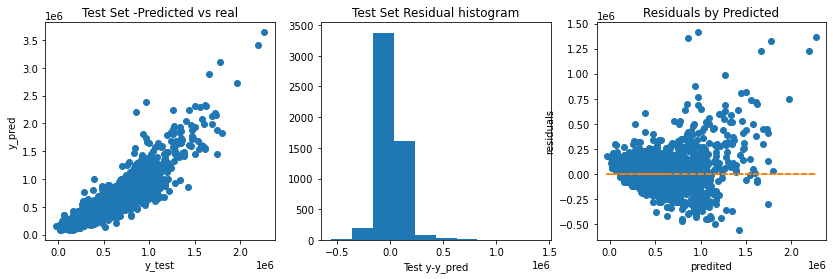

In [964]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

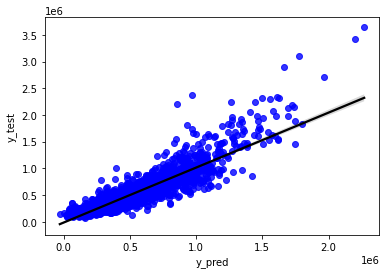

In [965]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "blue"}, line_kws={"color": "black"})

### ERROR METRICS

In [966]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

13639912779.949064
73948.23168811249


In [967]:
##prediction on the train set
mse(y_train,y_pred_train)

12215297899.15636

In [968]:
R2=r2_score(y_test,y_pred)
R2

0.8193924141848395

In [969]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [970]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.8166429171600607

### GETTING THE PARAMETERS

In [971]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [972]:
features_importances

,Attribute,Importance
5,view,1.300327e+17
4,waterfront,2.403124e+16
10,yr_renovated,2.140442e+16
2,sqm_living,1.368395e+05
13,98004,8.032300e+04
...,...,...
22,98022,1.216000e+03
36,98042,5.030000e+02
12,98003,2.950000e+02
28,98030,2.640000e+02


In [973]:
feature_imp_df = features_importances.iloc[0:4,0:2]
feature_imp_df

,Attribute,Importance
5,view,1.300327e+17
4,waterfront,2.403124e+16
10,yr_renovated,2.140442e+16
2,sqm_living,1.368395e+05


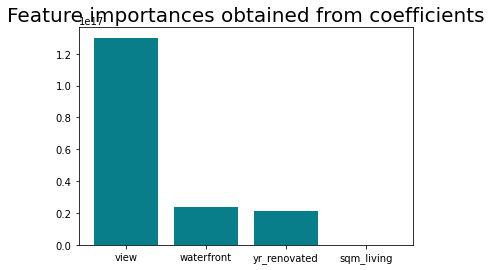

In [974]:
plt.bar(x=feature_imp_df['Attribute'], height=feature_imp_df['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='horizontal')
plt.show()